In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import OptimizeWarning
from matplotlib.ticker import FuncFormatter

In [2]:
# Read data from Excel files
filenames_NMC = ['Data/Data cleaned/data_clean_NMC_7.xlsx', 'Data/Data cleaned/data_clean_NMC_8.xlsx','Data/Data cleaned/data_clean_NMC_13.xlsx','Data/Data cleaned/data_clean_NMC_14.xlsx']
filenames_LFP = ['data_clean_LFP_5.xlsx', 'data_clean_LFP_6.xlsx','data_clean_LFP_15.xlsx','data_clean_LFP_16.xlsx']

# Define the fixed parameters for each dataset
fixed_parameters_NMC = [
    {'SOC': 60, 'R_g': 8.3140, 'T': 20, 'I_c': 0.25, 'E_a': 31500},
    {'SOC': 60, 'R_g': 8.3140, 'T': 20, 'I_c': 0.25, 'E_a': 31500},
    {'SOC': 60, 'R_g': 8.3140, 'T': 35, 'I_c': 0.25, 'E_a': 31500},
    {'SOC': 60, 'R_g': 8.3140, 'T': 35, 'I_c': 0.25, 'E_a': 31500}
]

fixed_parameters_LFP = [
    # Adjust these parameters as needed
    {'SOC': 60, 'R_g': 8.3140, 'T': 20, 'I_c': 0.25, 'E_a': 31500},
    {'SOC': 60, 'R_g': 8.3140, 'T': 20, 'I_c': 0.25, 'E_a': 31500},
    {'SOC': 60, 'R_g': 8.3140, 'T': 35, 'I_c': 0.25, 'E_a': 31500},
    {'SOC': 60, 'R_g': 8.3140, 'T': 35, 'I_c': 0.25, 'E_a': 31500}
]

# Initialize empty lists to store the data and parameters
Ah_list = []
Q_loss_list = []
parameter_list = []

# Loop through each file for NMC data and parameters
for filename, parameters in zip(filenames_NMC, fixed_parameters_NMC):
    df = pd.read_excel(filename)
    Ah_list.append(df['Var1'].values)
    Q_loss_list.append(df['Var2'].values)
    parameter_list.append(parameters)

# Loop through each file for LFP data and parameters
for filename, parameters in zip(filenames_LFP, fixed_parameters_LFP):
    df = pd.read_excel(filename)
    Ah_list.append(df['Var1'].values)
    Q_loss_list.append(df['Var2'].values)
    parameter_list.append(parameters)


In [3]:
# Define the fit model, in this case a custom function
def fit_model(Ah, a, b, n, z, parameters):
    SOC = parameters['SOC']
    R_g = parameters['R_g']
    T = parameters['T']
    I_c = parameters['I_c']
    E_a = parameters['E_a']
    return (a*SOC+b)*np.exp((n*I_c - E_a)/(R_g*(273.15+T)))*(Ah**z)

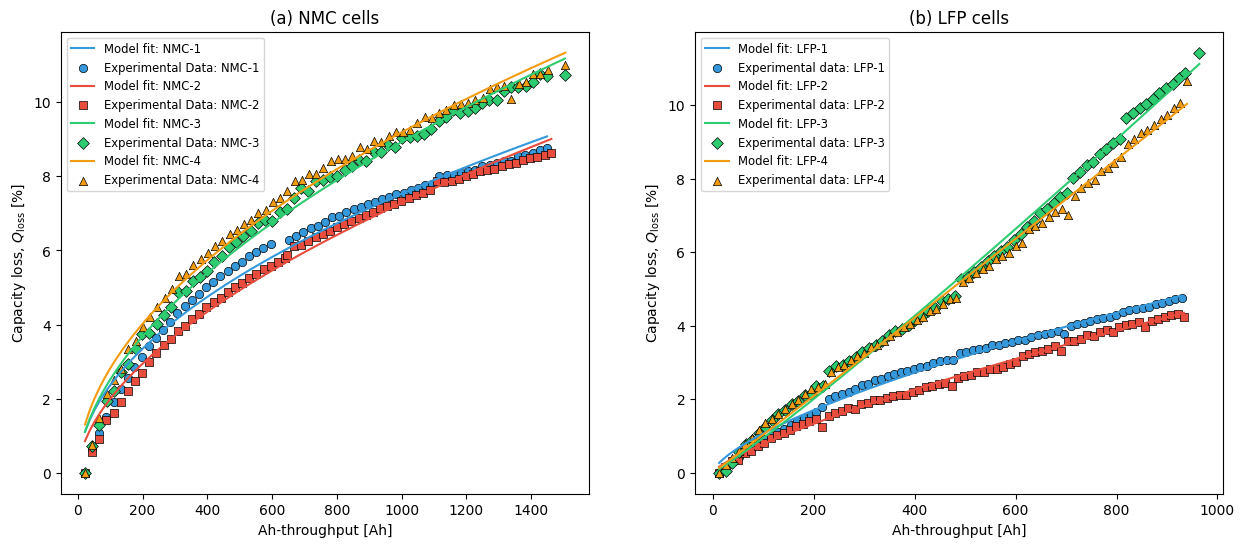

In [4]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Define colors and markers for each dataset
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
markers = ['o', 's', 'D', '^']
dataset_names_NMC = ['NMC-1', 'NMC-2', 'NMC-3', 'NMC-4']
dataset_names_LFP = ['LFP-1', 'LFP-2', 'LFP-3', 'LFP-4']

# Function to fit the model
def fit_func(Ah, a, b, n, z, parameters):
    return fit_model(Ah, a, b, n, z, parameters)

# Loop through each NMC dataset and plot the data
for dataset_idx, (Ah, Q_loss, parameters) in enumerate(zip(Ah_list[:4], Q_loss_list[:4], parameter_list[:4]), start=0):
    try:
        # Fit the data using the custom fitting model and the fixed parameters
        p0 = [0, 0, 0, 0]  # Initial guess for the parameters
        params, _ = curve_fit(lambda Ah, a, b, n, z: fit_func(Ah, a, b, n, z, parameters), Ah, Q_loss, p0=p0)

        # Extract the fitted parameters
        a, b, n, z = params

    except OptimizeWarning as e:
        print(f"Warning: {e}")
        print(f"Skipping dataset {dataset_idx + 1}")
        continue

    # Extract the fitted equation
    def fitted_equation(Ah):
        return fit_model(Ah, a, b, n, z, parameters)

    # Define the range of Ah values to be plotted
    Ah_range = np.linspace(np.min(Ah), np.max(Ah), 100)

    # Evaluate the fitted expression for the defined range of Ah values
    Q_loss_fit = fitted_equation(Ah_range)

    # Plot the fitted expression and data with tailored labels, colors, and markers
    axs[0].plot(Ah_range, Q_loss_fit, color=colors[dataset_idx], label=f'Model fit: {dataset_names_NMC[dataset_idx]}')
    axs[0].scatter(Ah, Q_loss, color=colors[dataset_idx], marker=markers[dataset_idx], label=f'Experimental Data: {dataset_names_NMC[dataset_idx]}', edgecolors='black', linewidth=0.5)

# Loop through each LFP dataset and plot the data
for dataset_idx, (Ah, Q_loss, parameters) in enumerate(zip(Ah_list[4:], Q_loss_list[4:], parameter_list[4:]), start=0):
    try:
        # Fit the data using the custom fitting model and the fixed parameters
        p0 = [0, 0, 0, 0]  # Initial guess for the parameters
        params, _ = curve_fit(lambda Ah, a, b, n, z: fit_func(Ah, a, b, n, z, parameters), Ah, Q_loss, p0=p0)

        # Extract the fitted parameters
        a, b, n, z = params

    except OptimizeWarning as e:
        print(f"Warning: {e}")
        print(f"Skipping dataset {dataset_idx + 1}")
        continue

    # Extract the fitted equation
    def fitted_equation(Ah):
        return fit_model(Ah, a, b, n, z, parameters)

    # Define the range of Ah values to be plotted
    Ah_range = np.linspace(np.min(Ah), np.max(Ah), 100)

    # Evaluate the fitted expression for the defined range of Ah values
    Q_loss_fit = fitted_equation(Ah_range)

    # Plot the fitted expression and data with tailored labels, colors, and markers
    axs[1].plot(Ah_range, Q_loss_fit, color=colors[dataset_idx], label=f'Model fit: {dataset_names_LFP[dataset_idx]}')
    axs[1].scatter(Ah, Q_loss, color=colors[dataset_idx], marker=markers[dataset_idx], label=f'Experimental data: {dataset_names_LFP[dataset_idx]}', edgecolors='black', linewidth=0.5)

# Set the labels and title for the plot
axs[0].set_title('(a) NMC cells')
axs[1].set_title('(b) LFP cells')
axs[0].set_xlabel('Ah-throughput [Ah]')
axs[1].set_xlabel('Ah-throughput [Ah]')
axs[0].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[1].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[0].legend(fontsize='small')  # Adjust the legend font size
axs[1].legend(loc='upper left', fontsize='small')  # Adjust the legend font size and location

# Display the plot
plt.show()


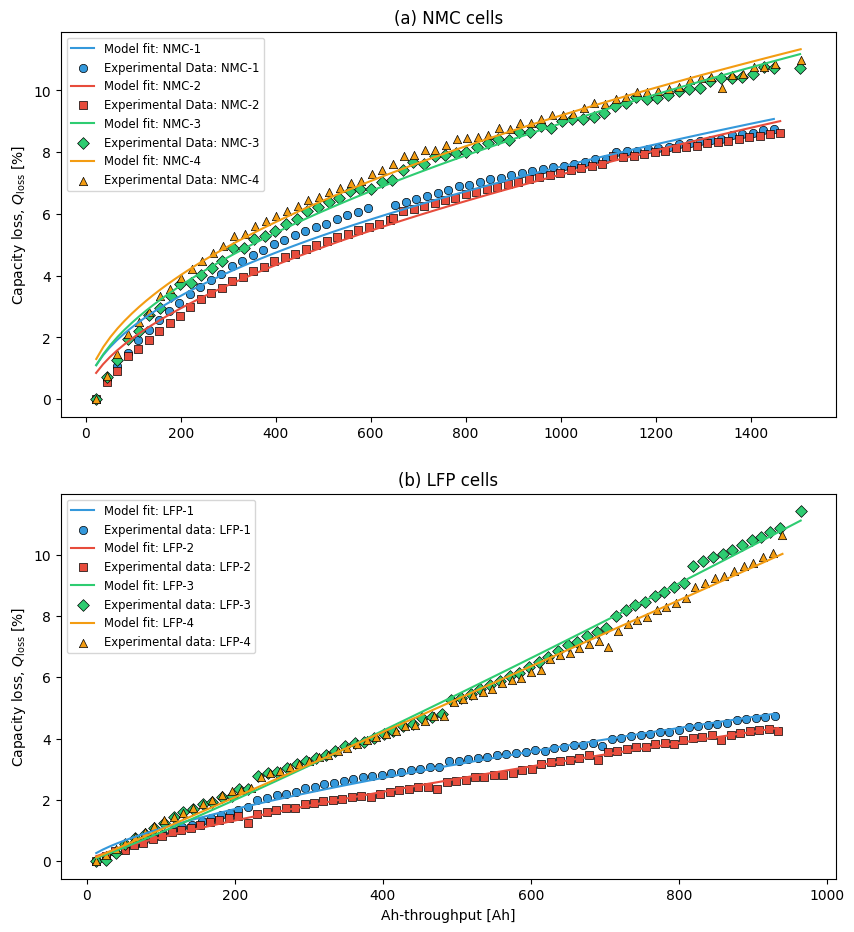

In [5]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 11))

# Define colors and markers for each dataset
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
markers = ['o', 's', 'D', '^']
dataset_names_NMC = ['NMC-1', 'NMC-2', 'NMC-3', 'NMC-4']
dataset_names_LFP = ['LFP-1', 'LFP-2', 'LFP-3', 'LFP-4']

# Function to fit the model
def fit_func(Ah, a, b, n, z, parameters):
    return fit_model(Ah, a, b, n, z, parameters)

# Loop through each NMC dataset and plot the data
for dataset_idx, (Ah, Q_loss, parameters) in enumerate(zip(Ah_list[:4], Q_loss_list[:4], parameter_list[:4]), start=0):
    try:
        # Fit the data using the custom fitting model and the fixed parameters
        p0 = [0, 0, 0, 0]  # Initial guess for the parameters
        params, _ = curve_fit(lambda Ah, a, b, n, z: fit_func(Ah, a, b, n, z, parameters), Ah, Q_loss, p0=p0)

        # Extract the fitted parameters
        a, b, n, z = params

    except OptimizeWarning as e:
        print(f"Warning: {e}")
        print(f"Skipping dataset {dataset_idx + 1}")
        continue

    # Extract the fitted equation
    def fitted_equation(Ah):
        return fit_model(Ah, a, b, n, z, parameters)

    # Define the range of Ah values to be plotted
    Ah_range = np.linspace(np.min(Ah), np.max(Ah), 100)

    # Evaluate the fitted expression for the defined range of Ah values
    Q_loss_fit = fitted_equation(Ah_range)

    # Plot the fitted expression and data with tailored labels, colors, and markers
    axs[0].plot(Ah_range, Q_loss_fit, color=colors[dataset_idx], label=f'Model fit: {dataset_names_NMC[dataset_idx]}')
    axs[0].scatter(Ah, Q_loss, color=colors[dataset_idx], marker=markers[dataset_idx], label=f'Experimental Data: {dataset_names_NMC[dataset_idx]}', edgecolors='black', linewidth=0.5)

# Loop through each LFP dataset and plot the data
for dataset_idx, (Ah, Q_loss, parameters) in enumerate(zip(Ah_list[4:], Q_loss_list[4:], parameter_list[4:]), start=0):
    try:
        # Fit the data using the custom fitting model and the fixed parameters
        p0 = [0, 0, 0, 0]  # Initial guess for the parameters
        params, _ = curve_fit(lambda Ah, a, b, n, z: fit_func(Ah, a, b, n, z, parameters), Ah, Q_loss, p0=p0)

        # Extract the fitted parameters
        a, b, n, z = params

    except OptimizeWarning as e:
        print(f"Warning: {e}")
        print(f"Skipping dataset {dataset_idx + 1}")
        continue

    # Extract the fitted equation
    def fitted_equation(Ah):
        return fit_model(Ah, a, b, n, z, parameters)

    # Define the range of Ah values to be plotted
    Ah_range = np.linspace(np.min(Ah), np.max(Ah), 100)

    # Evaluate the fitted expression for the defined range of Ah values
    Q_loss_fit = fitted_equation(Ah_range)

    # Plot the fitted expression and data with tailored labels, colors, and markers
    axs[1].plot(Ah_range, Q_loss_fit, color=colors[dataset_idx], label=f'Model fit: {dataset_names_LFP[dataset_idx]}')
    axs[1].scatter(Ah, Q_loss, color=colors[dataset_idx], marker=markers[dataset_idx], label=f'Experimental data: {dataset_names_LFP[dataset_idx]}', edgecolors='black', linewidth=0.5)

# Set the labels and title for the plot
axs[0].set_title('(a) NMC cells')
axs[1].set_title('(b) LFP cells')
axs[1].set_xlabel('Ah-throughput [Ah]')
axs[0].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[1].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[0].legend(fontsize='small')  # Adjust the legend font size
axs[1].legend(loc='upper left', fontsize='small')  # Adjust the legend font size and location

# Display the plot
plt.show()

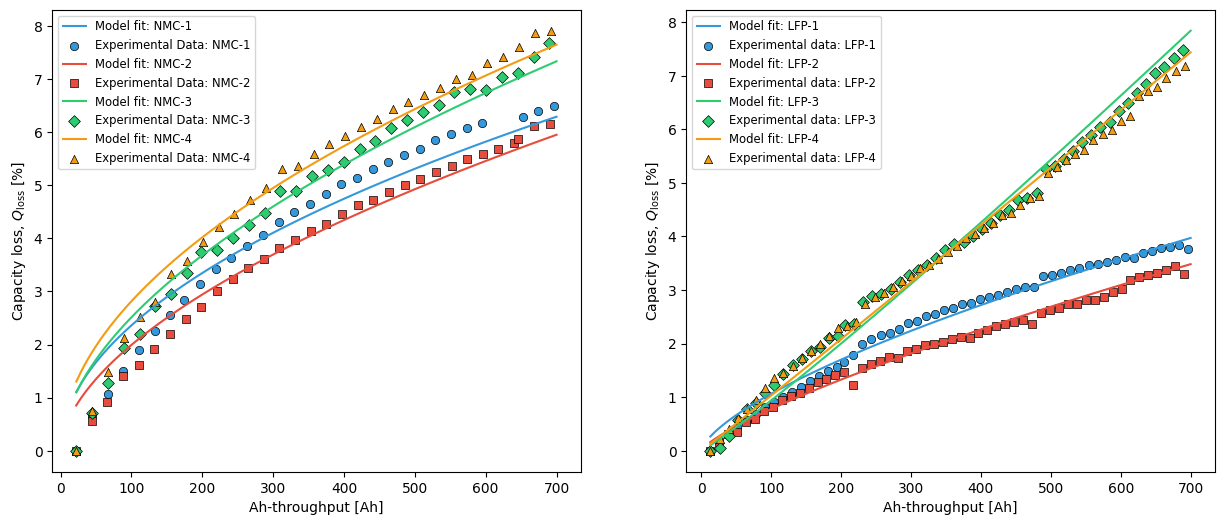

In [6]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Define colors and markers for each dataset
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
markers = ['o', 's', 'D', '^']
dataset_names_NMC = ['NMC-1', 'NMC-2', 'NMC-3', 'NMC-4']
dataset_names_LFP = ['LFP-1', 'LFP-2', 'LFP-3', 'LFP-4']

# Function to fit the model
def fit_func(Ah, a, b, n, z, parameters):
    return fit_model(Ah, a, b, n, z, parameters)

# Loop through each NMC dataset and plot the data
for dataset_idx, (Ah, Q_loss, parameters) in enumerate(zip(Ah_list[:4], Q_loss_list[:4], parameter_list[:4]), start=0):
    try:
        # Fit the data using the custom fitting model and the fixed parameters
        p0 = [0, 0, 0, 0]  # Initial guess for the parameters
        params, _ = curve_fit(lambda Ah, a, b, n, z: fit_func(Ah, a, b, n, z, parameters), Ah, Q_loss, p0=p0)

        # Extract the fitted parameters
        a, b, n, z = params

    except OptimizeWarning as e:
        print(f"Warning: {e}")
        print(f"Skipping dataset {dataset_idx + 1}")
        continue

    # Extract the fitted equation
    def fitted_equation(Ah):
        return fit_model(Ah, a, b, n, z, parameters)

    # Define the range of Ah values to be plotted (limiting to exactly 700 Ah)
    Ah_range = np.linspace(np.min(Ah), 700, 100)

    # Evaluate the fitted expression for the defined range of Ah values
    Q_loss_fit = fitted_equation(Ah_range)

    # Plot the fitted expression and data with tailored labels, colors, and markers
    axs[0].plot(Ah_range, Q_loss_fit, color=colors[dataset_idx], label=f'Model fit: {dataset_names_NMC[dataset_idx]}')
    axs[0].scatter(Ah[Ah <= 700], Q_loss[Ah <= 700], color=colors[dataset_idx], marker=markers[dataset_idx], label=f'Experimental Data: {dataset_names_NMC[dataset_idx]}', edgecolors='black', linewidth=0.5)

# Loop through each LFP dataset and plot the data
for dataset_idx, (Ah, Q_loss, parameters) in enumerate(zip(Ah_list[4:], Q_loss_list[4:], parameter_list[4:]), start=0):
    try:
        # Fit the data using the custom fitting model and the fixed parameters
        p0 = [0, 0, 0, 0]  # Initial guess for the parameters
        params, _ = curve_fit(lambda Ah, a, b, n, z: fit_func(Ah, a, b, n, z, parameters), Ah, Q_loss, p0=p0)

        # Extract the fitted parameters
        a, b, n, z = params

    except OptimizeWarning as e:
        print(f"Warning: {e}")
        print(f"Skipping dataset {dataset_idx + 1}")
        continue

    # Extract the fitted equation
    def fitted_equation(Ah):
        return fit_model(Ah, a, b, n, z, parameters)

    # Define the range of Ah values to be plotted (limiting to exactly 700 Ah)
    Ah_range = np.linspace(np.min(Ah), 700, 100)

    # Evaluate the fitted expression for the defined range of Ah values
    Q_loss_fit = fitted_equation(Ah_range)

    # Plot the fitted expression and data with tailored labels, colors, and markers
    axs[1].plot(Ah_range, Q_loss_fit, color=colors[dataset_idx], label=f'Model fit: {dataset_names_LFP[dataset_idx]}')
    axs[1].scatter(Ah[Ah <= 700], Q_loss[Ah <= 700], color=colors[dataset_idx], marker=markers[dataset_idx], label=f'Experimental data: {dataset_names_LFP[dataset_idx]}', edgecolors='black', linewidth=0.5)

# Set the labels and title for the plot
axs[0].set_xlabel('Ah-throughput [Ah]')
axs[1].set_xlabel('Ah-throughput [Ah]')
axs[0].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[1].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[0].legend(fontsize='small')  # Adjust the legend font size
axs[1].legend(loc='upper left', fontsize='small')  # Adjust the legend font size and location

# Display the plot
plt.show()

In [7]:
# Initialize a list to store dictionaries for each entry
entry_info_list = []

# Loop through each NMC dataset
for dataset_idx, (Ah, Q_loss, parameters) in enumerate(zip(Ah_list[:4], Q_loss_list[:4], parameter_list[:4]), start=0):
    # Fit the data using the custom fitting model and the fixed parameters
    p0 = [0, 0, 0, 0]  # Initial guess for the parameters
    params, _ = curve_fit(lambda Ah, a, b, n, z: fit_model(Ah, a, b, n, z, parameters), Ah, Q_loss, p0=p0)

    # Extract the fitted parameters
    a, b, n, z = params

    # Extract additional information
    SOC = parameters['SOC']
    R_g = parameters['R_g']
    T = parameters['T']
    I_c = parameters['I_c']
    E_a = parameters['E_a']
    Severity_factor = (a*SOC+b) * np.exp((n*I_c - E_a) / (R_g * (273.15 + T)))
    r_square = 1 - np.sum((fit_model(Ah, a, b, n, z, parameters) - Q_loss)**2) / np.sum((Q_loss - np.mean(Q_loss))**2)

    # Append information to the list
    entry_info_list.append({
        'Dataset': f'NMC-{dataset_idx + 1}',
        'SOC': SOC,
        'R_g': R_g,
        'T': T,
        'I_c': I_c,
        'E_a': E_a,
        'Severity_factor': Severity_factor,
        'a':a,
        'b':b,
        'n':n,
        'z':z,
        'R_square': r_square
    })

    # Generate a range of y values
    Ah_values = np.linspace(0, 5000, 2000)

    # Calculate the corresponding x values using the formula
    Q_loss_values = Severity_factor * (Ah_values**z)

# Loop through each LFP dataset
for dataset_idx, (Ah, Q_loss, parameters) in enumerate(zip(Ah_list[4:], Q_loss_list[4:], parameter_list[4:]), start=0):
    # Fit the data using the custom fitting model and the fixed parameters
    p0 = [0, 0, 0, 0]  # Initial guess for the parameters
    params, _ = curve_fit(lambda Ah, a, b, n, z: fit_model(Ah, a, b, n, z, parameters), Ah, Q_loss, p0=p0)

    # Extract the fitted parameters
    a, b, n, z = params

    # Extract additional information
    SOC = parameters['SOC']
    R_g = parameters['R_g']
    T = parameters['T']
    I_c = parameters['I_c']
    E_a = parameters['E_a']
    Severity_factor = (a*SOC+b) * np.exp((n*I_c - E_a) / (R_g * (273.15 + T)))
    r_square = 1 - np.sum((fit_model(Ah, a, b, n, z, parameters) - Q_loss)**2) / np.sum((Q_loss - np.mean(Q_loss))**2)

    # Append information to the list
    entry_info_list.append({
        'Dataset': f'LFP-{dataset_idx + 1}',
        'SOC': SOC,
        'R_g': R_g,
        'T': T,
        'I_c': I_c,
        'E_a': E_a,
        'Severity_factor': Severity_factor,
        'a':a,
        'b':b,
        'n':n,
        'z':z,
        'R_square': r_square
    })

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(entry_info_list)

# Display the DataFrame
print(df)

  Dataset  SOC    R_g   T   I_c    E_a  Severity_factor             a  \
0   NMC-1   60  8.314  20  0.25  31500         0.231828  61096.342750   
1   NMC-2   60  8.314  20  0.25  31500         0.149351  59440.308713   
2   NMC-3   60  8.314  35  0.25  31500         0.198950  32074.470184   
3   NMC-4   60  8.314  35  0.25  31500         0.264084  32159.545814   
4   LFP-1   60  8.314  20  0.25  31500         0.047026 -56729.720443   
5   LFP-2   60  8.314  20  0.25  31500         0.022490 -56424.581652   
6   LFP-3   60  8.314  35  0.25  31500         0.006216  30177.456304   
7   LFP-4   60  8.314  35  0.25  31500         0.009617  30357.541083   

              b          n         z  R_square  
0 -3.571112e+06  43.999617  0.503883  0.978957  
1 -3.504924e+06 -36.664373  0.562531  0.987789  
2 -1.881106e+06  33.048720  0.550664  0.990523  
3 -1.871742e+06 -15.247982  0.513818  0.986265  
4  3.423063e+06   5.190210  0.677205  0.991681  
5  3.394716e+06 -16.407993  0.769749  0.995510  

In [8]:
# Define the aging models
def aging_model_1(Ah):
    return 0.0261 * Ah**0.747 #LFP 1
def aging_model_2(Ah):
    return 0.0248 * Ah**0.745 #LFP 2
def aging_model_3(Ah):
    return 0.012708 * Ah**0.851712 #LFP 3
def aging_model_4(Ah):
    return 0.016122 * Ah**0.829894 #LFP 4
def aging_model_5(Ah):
    return 0.231828 * Ah**0.503883 #NMC 1
def aging_model_6(Ah):
    return 0.149351 * Ah**0.562531 #NMC 2
def aging_model_7(Ah):
    return 0.198950 * Ah**0.550664 #NMC 3
def aging_model_8(Ah):
    return 0.264084 * Ah**0.513818 #NMC 4

LFP-1: (7266.06707932929, 20)
LFP-2: (7969.801358083812, 20)
LFP-3: (5669.735082389261, 20)
LFP-4: (5342.178312666659, 20)
NMC-1: (6948.573393379616, 20)
NMC-2: (6036.8867900855785, 20)
NMC-3: (4326.509764720394, 20)
NMC-4: (4544.68298737625, 20)


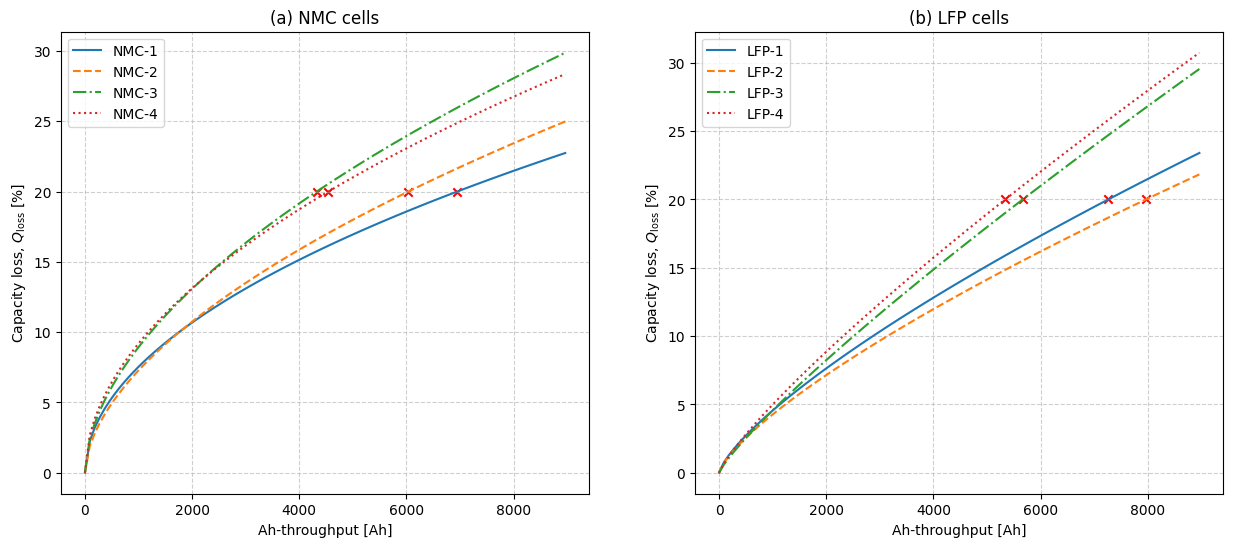

In [9]:
# New color palette and line styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
line_styles = ['-', '--', '-.', ':']

# Generate Ah values from 0 to a point where Q_loss reaches 20%
Ah_values = np.linspace(0, ((25 / 0.038) ** (1 / 0.713)), 100)

# Calculate corresponding Q_loss values using each aging model
Q_loss_values_1 = aging_model_1(Ah_values)
Q_loss_values_2 = aging_model_2(Ah_values)
Q_loss_values_3 = aging_model_3(Ah_values)
Q_loss_values_4 = aging_model_4(Ah_values)
Q_loss_values_5 = aging_model_5(Ah_values)
Q_loss_values_6 = aging_model_6(Ah_values)
Q_loss_values_7 = aging_model_7(Ah_values)
Q_loss_values_8 = aging_model_8(Ah_values)

# Find the (x, y) point where Q_loss is 20% for each curve
point_20_1 = (np.interp(20, Q_loss_values_1, Ah_values), 20)
point_20_2 = (np.interp(20, Q_loss_values_2, Ah_values), 20)
point_20_3 = (np.interp(20, Q_loss_values_3, Ah_values), 20)
point_20_4 = (np.interp(20, Q_loss_values_4, Ah_values), 20)
point_20_5 = (np.interp(20, Q_loss_values_5, Ah_values), 20)
point_20_6 = (np.interp(20, Q_loss_values_6, Ah_values), 20)
point_20_7 = (np.interp(20, Q_loss_values_7, Ah_values), 20)
point_20_8 = (np.interp(20, Q_loss_values_8, Ah_values), 20)

# Print the (x, y) points where Q_loss is 20% for each curve
print('LFP-1:', point_20_1)
print('LFP-2:', point_20_2)
print('LFP-3:', point_20_3)
print('LFP-4:', point_20_4)
print('NMC-1:', point_20_5)
print('NMC-2:', point_20_6)
print('NMC-3:', point_20_7)
print('NMC-4:', point_20_8)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot lines with new colors and line styles
axs[0].plot(Ah_values, Q_loss_values_5, label='NMC-1', color=colors[0], linestyle=line_styles[0])
axs[0].plot(Ah_values, Q_loss_values_6, label='NMC-2', color=colors[1], linestyle=line_styles[1])
axs[0].plot(Ah_values, Q_loss_values_7, label='NMC-3', color=colors[2], linestyle=line_styles[2])
axs[0].plot(Ah_values, Q_loss_values_8, label='NMC-4', color=colors[3], linestyle=line_styles[3])
axs[1].plot(Ah_values, Q_loss_values_1, label='LFP-1', color=colors[0], linestyle=line_styles[0])
axs[1].plot(Ah_values, Q_loss_values_2, label='LFP-2', color=colors[1], linestyle=line_styles[1])
axs[1].plot(Ah_values, Q_loss_values_3, label='LFP-3', color=colors[2], linestyle=line_styles[2])
axs[1].plot(Ah_values, Q_loss_values_4, label='LFP-4', color=colors[3], linestyle=line_styles[3])

# Plot a red 'x' at the point where Q_loss is 20%
axs[0].scatter(*point_20_5, marker='x', color='red')
axs[0].scatter(*point_20_6, marker='x', color='red')
axs[0].scatter(*point_20_7, marker='x', color='red')
axs[0].scatter(*point_20_8, marker='x', color='red')
axs[1].scatter(*point_20_1, marker='x', color='red')
axs[1].scatter(*point_20_2, marker='x', color='red')
axs[1].scatter(*point_20_3, marker='x', color='red')
axs[1].scatter(*point_20_4, marker='x', color='red')

# Set labels, legend, and grid
axs[0].set_title('(a) NMC cells')
axs[1].set_title('(b) LFP cells')
axs[0].set_xlabel('Ah-throughput [Ah]')
axs[1].set_xlabel('Ah-throughput [Ah]')
axs[0].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[1].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[0].legend()
axs[1].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[1].grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

LFP-1: (7266.06707932929, 20)
LFP-2: (7969.801358083812, 20)
LFP-3: (5669.735082389261, 20)
LFP-4: (5342.178312666659, 20)
NMC-1: (6948.573393379616, 20)
NMC-2: (6036.8867900855785, 20)
NMC-3: (4326.509764720394, 20)
NMC-4: (4544.68298737625, 20)


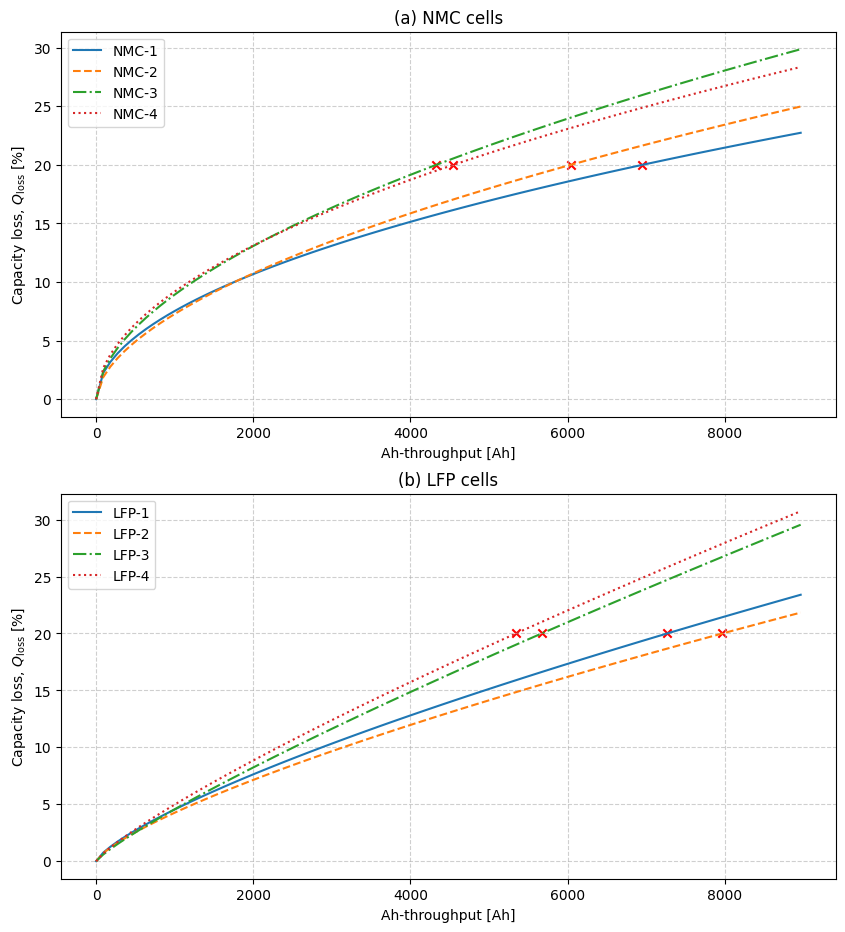

In [10]:
# New color palette and line styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
line_styles = ['-', '--', '-.', ':']

# Generate Ah values from 0 to a point where Q_loss reaches 20%
Ah_values = np.linspace(0, ((25 / 0.038) ** (1 / 0.713)), 100)

# Calculate corresponding Q_loss values using each aging model
Q_loss_values_1 = aging_model_1(Ah_values)
Q_loss_values_2 = aging_model_2(Ah_values)
Q_loss_values_3 = aging_model_3(Ah_values)
Q_loss_values_4 = aging_model_4(Ah_values)
Q_loss_values_5 = aging_model_5(Ah_values)
Q_loss_values_6 = aging_model_6(Ah_values)
Q_loss_values_7 = aging_model_7(Ah_values)
Q_loss_values_8 = aging_model_8(Ah_values)

# Find the (x, y) point where Q_loss is 20% for each curve
point_20_1 = (np.interp(20, Q_loss_values_1, Ah_values), 20)
point_20_2 = (np.interp(20, Q_loss_values_2, Ah_values), 20)
point_20_3 = (np.interp(20, Q_loss_values_3, Ah_values), 20)
point_20_4 = (np.interp(20, Q_loss_values_4, Ah_values), 20)
point_20_5 = (np.interp(20, Q_loss_values_5, Ah_values), 20)
point_20_6 = (np.interp(20, Q_loss_values_6, Ah_values), 20)
point_20_7 = (np.interp(20, Q_loss_values_7, Ah_values), 20)
point_20_8 = (np.interp(20, Q_loss_values_8, Ah_values), 20)

# Print the (x, y) points where Q_loss is 20% for each curve
print('LFP-1:', point_20_1)
print('LFP-2:', point_20_2)
print('LFP-3:', point_20_3)
print('LFP-4:', point_20_4)
print('NMC-1:', point_20_5)
print('NMC-2:', point_20_6)
print('NMC-3:', point_20_7)
print('NMC-4:', point_20_8)

fig, axs = plt.subplots(2, 1, figsize=(10, 11))

# Plot lines with new colors and line styles
axs[0].plot(Ah_values, Q_loss_values_5, label='NMC-1', color=colors[0], linestyle=line_styles[0])
axs[0].plot(Ah_values, Q_loss_values_6, label='NMC-2', color=colors[1], linestyle=line_styles[1])
axs[0].plot(Ah_values, Q_loss_values_7, label='NMC-3', color=colors[2], linestyle=line_styles[2])
axs[0].plot(Ah_values, Q_loss_values_8, label='NMC-4', color=colors[3], linestyle=line_styles[3])
axs[1].plot(Ah_values, Q_loss_values_1, label='LFP-1', color=colors[0], linestyle=line_styles[0])
axs[1].plot(Ah_values, Q_loss_values_2, label='LFP-2', color=colors[1], linestyle=line_styles[1])
axs[1].plot(Ah_values, Q_loss_values_3, label='LFP-3', color=colors[2], linestyle=line_styles[2])
axs[1].plot(Ah_values, Q_loss_values_4, label='LFP-4', color=colors[3], linestyle=line_styles[3])

# Plot a red 'x' at the point where Q_loss is 20%
axs[0].scatter(*point_20_5, marker='x', color='red')
axs[0].scatter(*point_20_6, marker='x', color='red')
axs[0].scatter(*point_20_7, marker='x', color='red')
axs[0].scatter(*point_20_8, marker='x', color='red')
axs[1].scatter(*point_20_1, marker='x', color='red')
axs[1].scatter(*point_20_2, marker='x', color='red')
axs[1].scatter(*point_20_3, marker='x', color='red')
axs[1].scatter(*point_20_4, marker='x', color='red')

# Set labels, legend, and grid
axs[0].set_title('(a) NMC cells')
axs[1].set_title('(b) LFP cells')
axs[0].set_xlabel('Ah-throughput [Ah]')
axs[1].set_xlabel('Ah-throughput [Ah]')
axs[0].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[1].set_ylabel('Capacity loss, $Q_{\mathrm{loss}}$ [%]')
axs[0].legend()
axs[1].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[1].grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()
